# Data Exploration & Visualization
Analyzed Lobsterland’s 2025 visitor and revenue data using Python to uncover trends in attendance, spending, and event performance. Applied exploratory data analysis and data visualization techniques to generate actionable business insights.

## Part I: Exploratory Data Analysis: Exploration & Manipulation

In [1]:
# Importing necessary functions
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [23]:
lobster_25 = pd.read_csv("data/lobster_25.csv")

In [24]:
lobster_25.head()

,Date,Day_of_Week,season_week_rel,Is_Holiday,Total_Visitors,Passholder_Percentage,Day_Tickets_Sold,Avg_Ticket_Price,Gate_Revenue,Revenue_Food,...,Weather_Type,Weather_Code,Promo_Flag,Promo_Type,Cruise_Docked,Is_Special_Event,Special_Events,Attraction_Tier,Zone_ID,Per_Capita_Spend
0,2025-05-26,Monday,1,1,1769,48.65,908,77.42,70297.36,40521.91,...,Thunderstorms,4,0,NaN,0,0,NaN,2,101,73.43
1,2025-05-27,Tuesday,1,0,1717,60.58,677,69.80,47254.60,35298.92,...,Partly Cloudy,2,0,NaN,0,0,NaN,2,101,59.30
2,2025-05-28,Wednesday,1,0,1600,30.84,1107,70.09,77589.63,36495.95,...,Partly Cloudy,2,0,NaN,0,0,NaN,3,103,82.33
3,2025-05-29,Thursday,1,0,1037,19.02,840,72.30,60732.00,22486.65,...,Showers,3,0,NaN,0,0,NaN,2,101,91.19
4,2025-05-30,Friday,1,0,1671,66.18,565,68.11,38482.15,40705.15,...,Partly Cloudy,2,0,NaN,0,0,NaN,1,104,58.67


In [25]:
lobster_25.shape

(99, 27)

There are 99 rows and 27 columns in this Lobsterland data set.

- **Categorical variables:**
Date, Day of Week, season_week_rel, is_holiday, Precipitation, Weather Type, Weather Code, Promo Flag, Promo Type, Cruise Docked, Is_Special_Event, Special_Events, Attraction_Tier, Zone_ID
- **Numeric variables:**
Total visitors, Passholder percentage, Day Tickets Sold, Avg Ticket Price, Gate Revenue, Revenue Food, Revenue Merch, Revenue Arcade, Total Revenue, Total Labor Hours, International Visitors, High temperature, Per Capita Spend

#### Checking for NaN values.

In [26]:
lobster_25.isnull().sum()

Date                       0
Day_of_Week                0
season_week_rel            0
Is_Holiday                 0
Total_Visitors             0
Passholder_Percentage      0
Day_Tickets_Sold           0
Avg_Ticket_Price           0
Gate_Revenue               0
Revenue_Food               0
Revenue_Merch              5
Revenue_Arcade             0
Total_Revenue              0
Total_Labor_Hours          0
International_Visitors     5
High_Temperature           0
Precipitation              0
Weather_Type               0
Weather_Code               0
Promo_Flag                 0
Promo_Type                79
Cruise_Docked              0
Is_Special_Event           0
Special_Events            84
Attraction_Tier            0
Zone_ID                    0
Per_Capita_Spend           0
dtype: int64

To check for NaN values, I used the code lobster25.isna().sum(). This showed the number of missing values in each column. The columns that contain missing values are Revenue_Merch with 5 missing entries, International_Visitors with 5 missing entries, Promo_Type with 79 missing entries, and Special_Events with 84 missing entries. These missing values are understandable because the columns represent optional events, promotions, or international visitors.

- For numeric variables like Revenue_Merch and International_Visitors, which are recorded in numbers, NaN likely means no merchandise revenue or no international visitors that day, so it can be replaced with 0.

- As for categorial variables like Promo_Type and Special_Events, NaN means no promotion/special event was active, so it’s better to fill them with descriptive text rather than 0. So, for Promo_Type, I replace NaN with "No Promo" and for Special_Events with "No Event" respectively.

In [ ]:
# Create and copy from the original dataframe so not to mess with it
lobster25 = lobster_25.copy() 

# Filling numeric variables with NaN to 0
lobster25['Revenue_Merch'] = lobster25['Revenue_Merch'].fillna(0.0)
lobster25['International_Visitors'] = lobster25['International_Visitors'].fillna(0.0)

In [28]:
lobster25["Promo_Type"] = lobster25["Promo_Type"].fillna("No Promo")
lobster25["Special_Events"] = lobster25["Special_Events"].fillna("No Event")

In [29]:
# Double-checking to see if there's still NaN in the data set
lobster25.isnull().sum()

Date                      0
Day_of_Week               0
season_week_rel           0
Is_Holiday                0
Total_Visitors            0
Passholder_Percentage     0
Day_Tickets_Sold          0
Avg_Ticket_Price          0
Gate_Revenue              0
Revenue_Food              0
Revenue_Merch             0
Revenue_Arcade            0
Total_Revenue             0
Total_Labor_Hours         0
International_Visitors    0
High_Temperature          0
Precipitation             0
Weather_Type              0
Weather_Code              0
Promo_Flag                0
Promo_Type                0
Cruise_Docked             0
Is_Special_Event          0
Special_Events            0
Attraction_Tier           0
Zone_ID                   0
Per_Capita_Spend          0
dtype: int64

I replaced NaNs in Revenue_Merch and International_Visitors with 0, assuming missing values indicate no revenue or no visitors. For Promo_Type and Special_Events, I used "No Promo" and "No Event" because missing entries mean no promotion or event occurred. I made these choices by considering what each column represents. This approach makes the dataset more informative and descriptive.

#### Rename the ‘Food_Rev’ column to ‘FoodBev_Rev’.

In [30]:
lobster25 = lobster25.rename(columns={'Revenue_Food':'Revenue_FoodBev'}) #rename the columns
# There is no 'Food_Rev' so I'm assuming it's 'Revenue_Food' and replace it with 'Revenue_FoodBev'
print(lobster25.columns)

Index(['Date', 'Day_of_Week', 'season_week_rel', 'Is_Holiday',
       'Total_Visitors', 'Passholder_Percentage', 'Day_Tickets_Sold',
       'Avg_Ticket_Price', 'Gate_Revenue', 'Revenue_FoodBev', 'Revenue_Merch',
       'Revenue_Arcade', 'Total_Revenue', 'Total_Labor_Hours',
       'International_Visitors', 'High_Temperature', 'Precipitation',
       'Weather_Type', 'Weather_Code', 'Promo_Flag', 'Promo_Type',
       'Cruise_Docked', 'Is_Special_Event', 'Special_Events',
       'Attraction_Tier', 'Zone_ID', 'Per_Capita_Spend'],
      dtype='object')


#### In the dataset, there are four components of total revenue: gate revenue, revenue food, revenue merch, and revenue arcade. Generate a table that shows average spending in each of those areas, based on Special Event types.

In [31]:
avg_rev_by_event = lobster25.groupby('Special_Events')[['Gate_Revenue','Revenue_FoodBev','Revenue_Merch','Revenue_Arcade']].mean()
print(avg_rev_by_event)

                         Gate_Revenue  Revenue_FoodBev  Revenue_Merch  \
Special_Events                                                          
Beatles Tribute         146630.870000     86767.966667   21431.026667   
MusicFest               107296.750000     83544.713333   33065.490000   
Night Glow              107957.660000     59590.776667   31730.376667   
No Event                 73213.523333     40692.877500   15931.317500   
Taylor Swift Lookalike   96895.336667     67165.716667   33479.076667   
Vintage Days            114238.410000     51074.406667   24561.976667   

                        Revenue_Arcade  
Special_Events                          
Beatles Tribute           10488.050000  
MusicFest                  9745.910000  
Night Glow                 8637.820000  
No Event                   3624.482500  
Taylor Swift Lookalike     9691.783333  
Vintage Days               6821.316667  


**Table analysis: Stand out points & limitations** <br>
Looking at the table, it’s clear that special events like Beatles Tribute and MusicFest bring in noticeably higher revenue across all areas compared to days with no events. This makes sense, as popular events tend to draw bigger crowds and encourage people to spend more on tickets, food, and merchandise. Some of the standout numbers are probably because certain events are more well-known or heavily promoted. That said, this analysis only looks at averages and doesn’t consider other factors like weather, day of the week, or seasonal trends. Because of these other influences, it’s hard to say for sure how much of the revenue boost is truly caused by the events themselves.

#### A ‘Date’ variable type. Use the info() function to determine the data type for the‘Date’ variable.

In [32]:
lobster25['Date'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 99 entries, 0 to 98
Series name: Date
Non-Null Count  Dtype 
--------------  ----- 
99 non-null     object
dtypes: object(1)
memory usage: 924.0+ bytes


Python currently views this variable as an object.

In [33]:
# Converting the variable into a datetime object.
lobster25['Date'] = pd.to_datetime(lobster25['Date'])

# Check to see if the conversion is successful
print(lobster25['Date'].dtype)

datetime64[ns]


Converting a column to datetime lets Python treat it as a real date, enabling operations like filtering by month, extracting weekdays, calculating durations, and plotting time-series data accurately. Without it, dates are just text and harder to analyze.

#### Using the groupby() function, along with the describe() function, explore the relationship between day of the week and total revenue. 

In [34]:
lobster25.groupby('Day_of_Week')[['Total_Revenue']].describe()

Total_Revenue                                          \
                    count           mean           std        min   
Day_of_Week                                                         
Friday               14.0  124348.351429  25766.281104   68899.07   
Monday               15.0  123881.241333  30711.357993   88753.13   
Saturday             14.0  233435.688571  63186.045667  132174.43   
Sunday               14.0  222040.763571  51689.800794  127310.71   
Thursday             14.0  110808.970000  23883.366451   63247.57   
Tuesday              14.0  110803.409286  28858.768417   64017.91   
Wednesday            14.0  111780.540000  24591.350227   75302.24   

                                                              
                     25%         50%          75%        max  
Day_of_Week                                                   
Friday       113828.1850  126337.460  134174.9625  180408.42  
Monday       101210.0300  110997.990  143166.6050  202565.15  
Saturday     209613.2550  227397.180  238614.4925  423019.37  
Sunday       211008.1775  245217.160  251046.1250  284520.15  
Thursday      94773.4125  112346.540  128805.5325  147562.14  
Tuesday       95816.2750  106621.260  132957.8850  166042.42  
Wednesday     92629.4175  111242.325  127296.6300  165467.64

Looking at the table, it’s pretty noticeable that weekends bring in much higher revenue than weekdays. Saturday averages around \$233,000 and Sunday about \$222,000, while most weekdays hover between \$110,000 and \$125,000. This makes sense since more people are likely to visit the park on their days off. The bigger variation in weekend revenues probably comes from special events or particularly busy days. Overall, the day of the week has a noticeable effect, with weekends clearly driving the biggest crowds and sales.

#### Lobster Land management has decided that they won’t be using the Zone_ID variable. Remove it, and demonstrate that it’s no longer part of the dataset going forward.

In [35]:
lobster25 = lobster25.drop(columns=['Zone_ID'], errors='ignore')
# Double-check
print(lobster25.columns)

Index(['Date', 'Day_of_Week', 'season_week_rel', 'Is_Holiday',
       'Total_Visitors', 'Passholder_Percentage', 'Day_Tickets_Sold',
       'Avg_Ticket_Price', 'Gate_Revenue', 'Revenue_FoodBev', 'Revenue_Merch',
       'Revenue_Arcade', 'Total_Revenue', 'Total_Labor_Hours',
       'International_Visitors', 'High_Temperature', 'Precipitation',
       'Weather_Type', 'Weather_Code', 'Promo_Flag', 'Promo_Type',
       'Cruise_Docked', 'Is_Special_Event', 'Special_Events',
       'Attraction_Tier', 'Per_Capita_Spend'],
      dtype='object')


## Part II: Visualization

#### Using any plotting tool in Python, generate a bar plot that shows Promo_Type on one axis and average gate revenue on the other. Be sure to give your plot a clear, descriptive title.

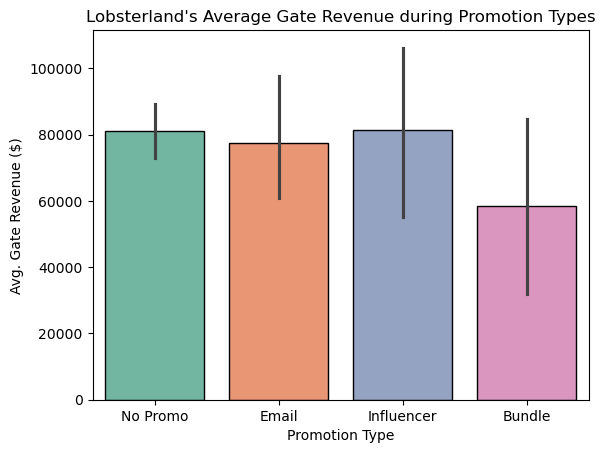

In [78]:
sns.barplot(x = "Promo_Type", y = "Gate_Revenue", data = lobster25, hue="Promo_Type", palette="Set2", dodge=False, edgecolor='black');
plt.xlabel("Promotion Type")
plt.ylabel("Avg. Gate Revenue ($)")
plt.title("Lobsterland's Average Gate Revenue during Promotion Types")
plt.show()

The bar plot shows that days with no promotion, email, or influencer campaigns have similar average gate revenue, while bundle promotions have noticeably lower revenue. Surprisingly, bundles seem less effective than doing nothing or running other promotions, possibly because they attract fewer people or are offered on slower days. Overall, not all promotions necessarily increase gate revenue.

#### Lobster Land management wants to better understand how visitor counts vary across the days of the week. Generate a barplot that shows average total visitors by day of Week.

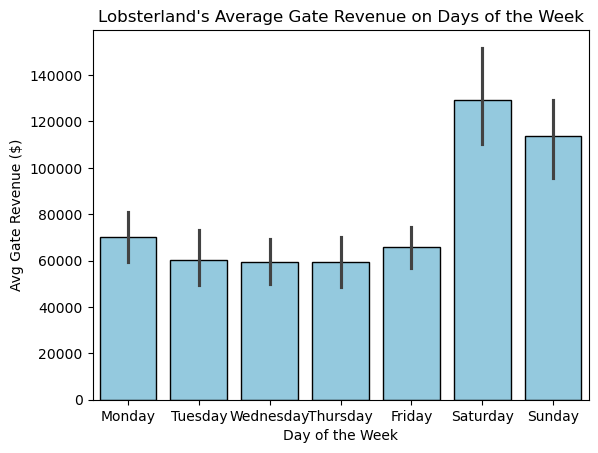

In [79]:
# Version 1: y-axis starting at 0
sns.barplot(x = "Day_of_Week", y = "Gate_Revenue", data = lobster25, color='skyblue', edgecolor='black');
plt.xlabel("Day of the Week")
plt.ylabel("Avg Gate Revenue ($)")
plt.title("Lobsterland's Average Gate Revenue on Days of the Week")
plt.ylim(0)
plt.show()

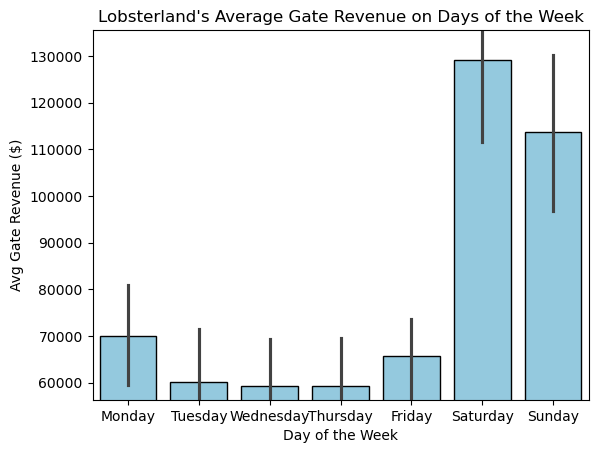

In [80]:
# Version 2: y-axis zoomed to highlight differences

avg_values = lobster25.groupby("Day_of_Week")["Gate_Revenue"].mean()

sns.barplot(x="Day_of_Week", y="Gate_Revenue", data=lobster25, color='skyblue', edgecolor='black')
plt.xlabel("Day of the Week")
plt.ylabel("Avg Gate Revenue ($)")
plt.title("Lobsterland's Average Gate Revenue on Days of the Week")

# Set y-axis limits slightly beyond min and max average values
plt.ylim(avg_values.min() * 0.95, avg_values.max() * 1.05)
plt.show()

Both plots display the same visitor data, but they feel very different. The first plot, with the y-axis starting at 0, shows the weekend boost in visitors clearly but keeps the differences in perspective. The second plot, with a zoomed-in y-axis, makes those differences look much larger and more dramatic than they really are. This kind of change can easily influence how people interpret the importance of the trend. That’s why, for bar charts, it’s usually best to start the axis at 0 — it helps present the data honestly and avoids misleading your audience.

#### Next, generate a histogram of per capita spend across all visitors in the 2025 season. Be sure to give your plot a clear, descriptive title.

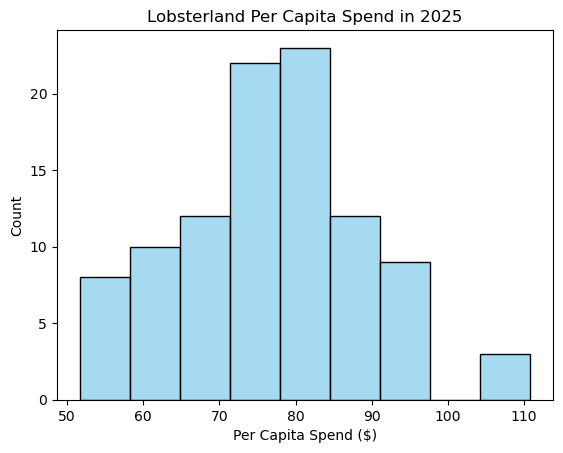

In [60]:
#Version 1: Non-adjusted bins
sns.histplot(data=lobster25, x="Per_Capita_Spend", color='skyblue', edgecolor='black')
plt.xlabel("Per Capita Spend ($)")
plt.title("Lobsterland Per Capita Spend in 2025")
plt.show()

The histogram shows that most visitors spend between about \$70 and \$85, with spending peaking around $80. The distribution is roughly bell-shaped, suggesting that per capita spending is fairly consistent across visitors, with only a few spending much lower or higher than the average.

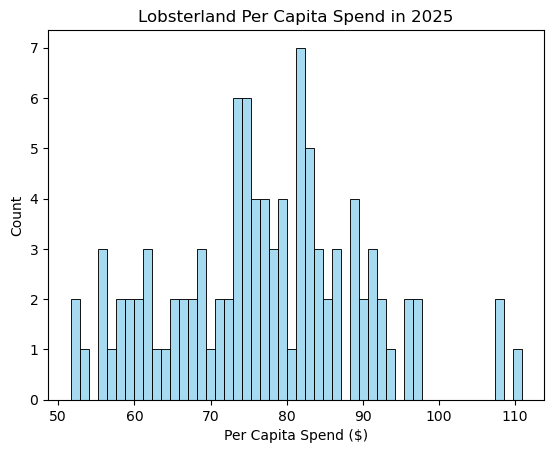

In [61]:
#Version 2: 50 bins
sns.histplot(data=lobster25, x="Per_Capita_Spend", bins=50, color='skyblue', edgecolor='black')
plt.xlabel("Per Capita Spend ($)")
plt.title("Lobsterland Per Capita Spend in 2025")
plt.show()

The second histogram, with 50 bins, shows a lot more detail about how people spend. Instead of the smooth, bell-like shape in the first plot, you can see smaller peaks and dips, almost like there are a few “favorite” spending amounts that visitors cluster around. Someone looking at this version might notice that spending habits are a bit more varied and not perfectly smooth, which isn’t as clear in the first histogram.

#### One member of the Lobster Land Board of Directors thinks that people tend to buy more merch on hot days. Let’s see whether the data supports this theory! Generate a scatterplot with the day’s high temperature on the x-axis, and with total merch revenue on the y-axis. Be sure to give your plot a clear, descriptive title.

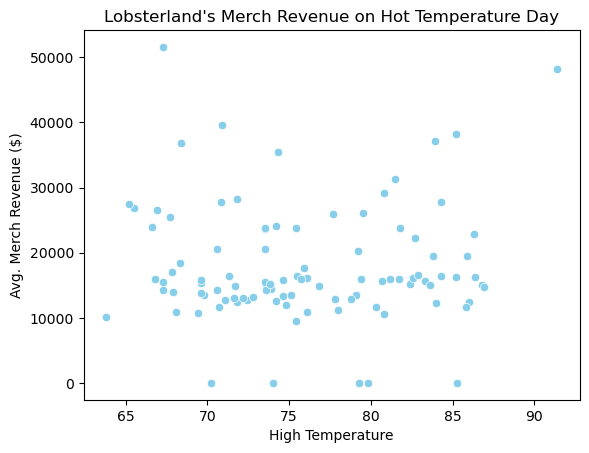

In [81]:
sns.scatterplot(x = "High_Temperature", y = "Revenue_Merch", data = lobster25, color='skyblue');
plt.xlabel("High Temperature")
plt.ylabel("Avg. Merch Revenue ($)")
plt.title("Lobsterland's Merch Revenue on Hot Temperature Day")
plt.show()

The scatterplot shows no clear relationship between high temperature and merch revenue — the points are spread fairly randomly across the temperature range. This suggests that hotter days do not consistently lead to higher merch sales. It’s possible that factors like crowd size, special events, or promotions play a bigger role in driving merch revenue than temperature alone.

#### Create a boxplot that shows day of week on one axis and passholder percentage on the other. Be sure to give your plot a clear, descriptive title.

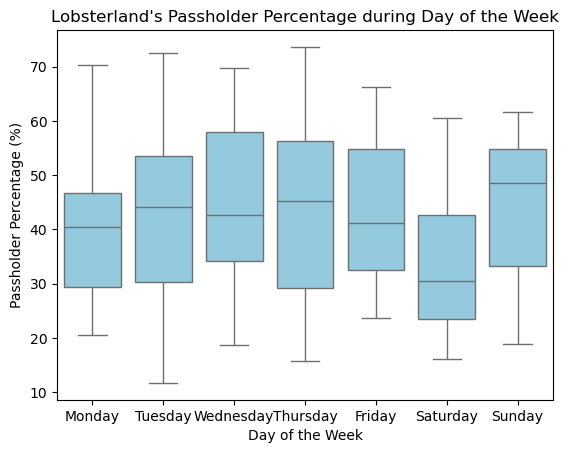

In [64]:
sns.boxplot(x="Day_of_Week", y="Passholder_Percentage", data=lobster25, color='skyblue')
plt.xlabel("Day of the Week")
plt.ylabel("Passholder Percentage (%)")
plt.title("Lobsterland's Passholder Percentage during Day of the Week")
plt.show()

The boxplot shows that weekdays, especially Wednesday and Thursday, tend to have higher passholder percentages compared to weekends. Saturday has the lowest median and a narrower range, meaning fewer passholders visit that day. This might be because weekends attract more casual or one-time visitors, while passholders prefer visiting during less crowded weekdays.

#### Create a barplot that shows average daily total visitors by month.

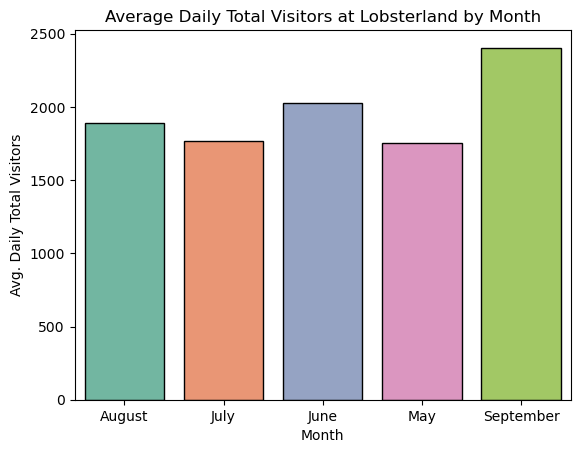

In [83]:
#create a new 'Month' column extracted from 'Date'
lobster25['Month'] = lobster25['Date'].dt.month_name()

monthly_avg = lobster25.groupby('Month', as_index=False)['Total_Visitors'].mean()

sns.barplot(x="Month", 
            y="Total_Visitors", 
            data=monthly_avg, 
            hue="Month", 
            palette="Set2", 
            dodge=False, 
            edgecolor='black')
plt.xlabel("Month")
plt.ylabel("Avg. Daily Total Visitors")
plt.title("Average Daily Total Visitors at Lobsterland by Month")
plt.show()

The bar plot shows that average daily visitors are highest in September and lowest in May and July. There’s a clear upward trend from August into September, suggesting strong late-season attendance. I would tell management that September appears to be a key month for drawing visitors, which could be a good time to focus marketing campaigns or launch special fall events to maximize engagement and revenue.

#### Generate a barplot that shows special events on one axis and average international visitors on the other. 

In [44]:
avg_visitor = lobster25.groupby("Special_Events")["International_Visitors"].mean().sort_values(ascending=False)
print(avg_visitor)

Special_Events
Taylor Swift Lookalike    236.666667
MusicFest                 201.333333
Beatles Tribute           194.000000
Vintage Days              178.666667
Night Glow                172.000000
No Event                  167.738095
Name: International_Visitors, dtype: float64


In [45]:
order_event = avg_visitor.index
print(order_event)

Index(['Taylor Swift Lookalike', 'MusicFest', 'Beatles Tribute',
       'Vintage Days', 'Night Glow', 'No Event'],
      dtype='object', name='Special_Events')


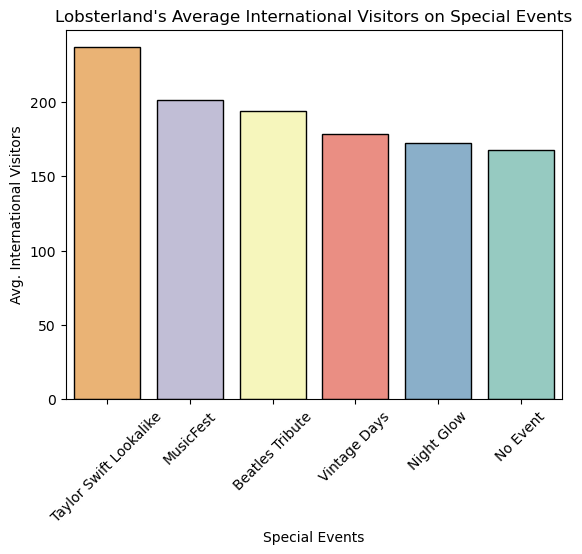

In [84]:
sns.barplot(x="Special_Events", 
            y="International_Visitors", 
            data=lobster25, 
            order=order_event, 
            errorbar=None, 
            hue="Special_Events", 
            palette="Set3", 
            dodge=False, 
            edgecolor='black')
plt.xlabel("Special Events")
plt.ylabel("Avg. International Visitors")
plt.xticks(rotation=45)
plt.title("Lobsterland's Average International Visitors on Special Events")
plt.show()

The barplot shows that the Taylor Swift Lookalike event attracts the highest average number of international visitors, followed by MusicFest and Beatles Tribute. Days with no events have the lowest international attendance. This suggests that special events, especially music-related ones, may encourage more international guests to visit. However, we cannot assume the events directly cause the increase, other factors like peak tourist season or holidays could also explain the higher numbers. This is why the relationship should be viewed as a correlation, not proof of causation.

#### Create a faceted bar plot of food & beverage revenue, with facets for weather type, and bars representing day of the week. 

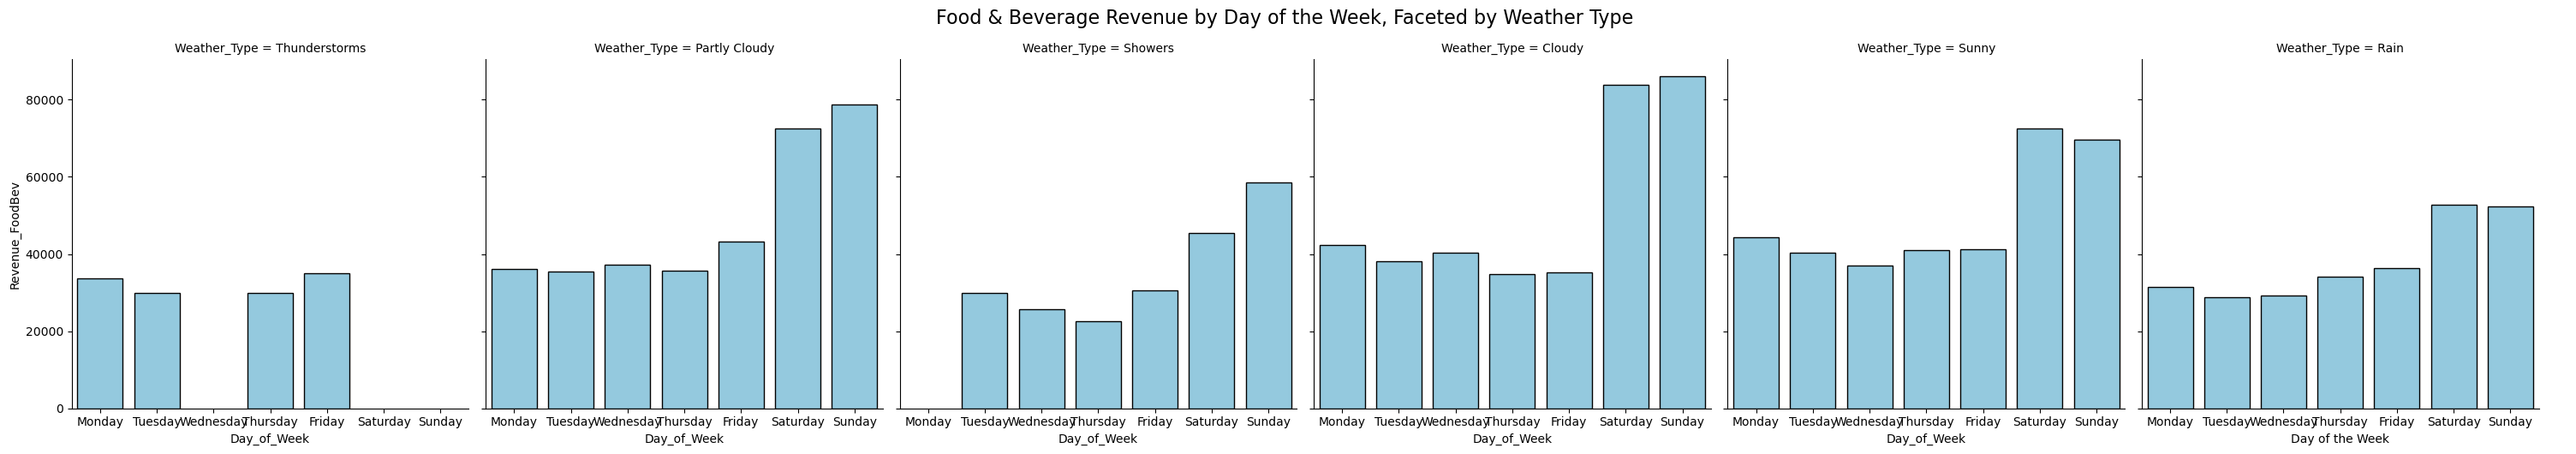

In [69]:
sns.catplot(x="Day_of_Week", 
            y="Revenue_FoodBev", 
            col="Weather_Type", 
            data=lobster25, 
            kind="bar",
            color='skyblue', 
            edgecolor='black',
            errorbar=None).fig.suptitle("Food & Beverage Revenue by Day of the Week, Faceted by Weather Type", fontsize=16, y=1.05)
plt.xlabel("Day of the Week")
plt.ylabel("Food & Beverage Revenue")
plt.show()

This plot shows that food and beverage sales really take off on weekends, especially when the weather is nice or just a bit cloudy. Thunderstorms seem to keep people away no matter the day, while sunny or partly cloudy Saturdays and Sundays bring in the biggest revenue. It’s interesting that even rainy weekends still perform better than most weekdays. However, this visualization does not show the number of observations (sample size) for each weather-day combination, making it hard to know whether some patterns are based on only a few data points.

#### Create a lineplot that shows season_week_rel on the x-axis, and aggregate (total) Gold Zone spending for that week on the y-axis.

In [48]:
lobster25[['Attraction_Tier','Per_Capita_Spend']]

,Attraction_Tier,Per_Capita_Spend
0,2,73.43
1,2,59.30
2,3,82.33
3,2,91.19
4,1,58.67
...,...,...
94,2,81.26
95,1,79.43
96,3,82.08
97,2,68.70


In [49]:
# Filter attraction tier to gold zone which is 1, copy() from lobster25() dataframe
gold_zone = lobster25.query('Attraction_Tier==1').copy() 

# Double-check to see if there's any zone other than 1
print(gold_zone['Attraction_Tier'].unique())

[1]


In [50]:
# Add a 'Total_Spend' column to record the total spending of gold zone by multiplying total visitors by per visitor spend
gold_zone['Total_Spend'] = gold_zone['Total_Visitors']*gold_zone['Per_Capita_Spend']

# Double-check to see if the tier and the calculation is correct
gold_zone[['Attraction_Tier','Total_Spend','season_week_rel']].tail()

,Attraction_Tier,Total_Spend,season_week_rel
88,1,131917.20,13
89,1,209116.95,13
91,1,110994.19,14
95,1,138287.63,14
98,1,202561.04,15


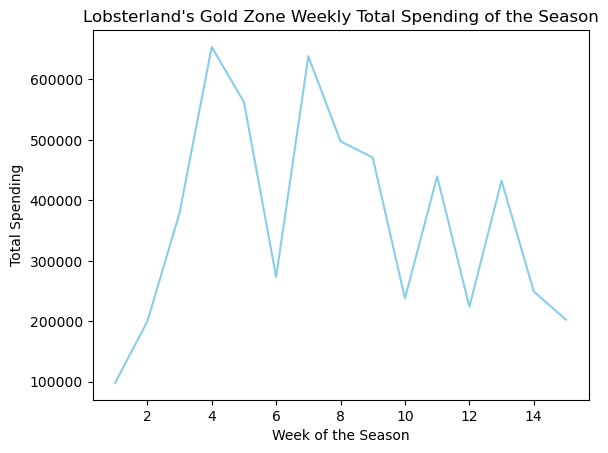

In [70]:
# Aggregrate the total spending of gol
gold_spend_weekly = gold_zone.groupby('season_week_rel')['Total_Spend'].sum().reset_index()

# Plot the line chart
sns.lineplot(data=gold_spend_weekly, x='season_week_rel',y='Total_Spend', color='skyblue')
plt.xlabel("Week of the Season")
plt.ylabel("Total Spending")
plt.title("Lobsterland's Gold Zone Weekly Total Spending of the Season")
plt.show()

This line plot shows that Gold Zone spending starts low during opening week and rises quickly, peaking around Weeks 4–5. After that, there’s a big drop, though Week 7 shows a nice little rebound before things taper off again toward the end of the season. This tells us guests spend the most when excitement is fresh and maybe when special events happen. I’d suggest management double down on promotions early in the season and figure out what drove that Week 7 spike so we can recreate it.